# Project: This is how Airbnb expanded to Seattle after years

## 1. Business Understanding
    
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

Brief description:

    Question 1: How was the pricing change by time in 2016?
    
    Question 2: Top 5 neighborhoods which were the most expensive and the most affordable in Seattle?
    
    Question 3: How did the number of new hosts increase by time?
    
The Airbnb open data provides us 3 following datasets:

    Listings: Full descriptions and average review score
    
    Reviews: Unique id for each reviewer and detailed comments
    
    Calendar: Listing id and the price and availability for that day
    


## 2 Data Understanding
    Access and Explore

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
import os

In [2]:
# list files in data folder
print(os.listdir("seattle"))

['listings.csv', 'reviews.csv', 'calendar.csv']


In [3]:
# Read data into dataframe
df_c = pd.read_csv('seattle/calendar.csv')
df_l = pd.read_csv('seattle/listings.csv')
df_r = pd.read_csv('seattle/reviews.csv')

In [4]:
df_c.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [6]:
df_c.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [7]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [8]:
#Check whether is there any listing room who has two condition (available and non available) in the same day
dfcek = df_c.groupby(['date','listing_id']).count()
dfcek[dfcek['available']>1]

,,available,price
date,listing_id,,


In [9]:
# check whether is there any change of total quantity listing room in the sample period
df_c.groupby('date').count()

,listing_id,available,price
date,,,
2016-01-04,3818,3818,1735
2016-01-05,3818,3818,1867
2016-01-06,3818,3818,1826
2016-01-07,3818,3818,1776
2016-01-08,3818,3818,1782
...,...,...,...
2016-12-29,3818,3818,2835
2016-12-30,3818,3818,2840
2016-12-31,3818,3818,2859


In [10]:
# Count unique listing id
df_c.listing_id.nunique()

3818

# 3. Prepare Data

In [11]:
# Convert "Price" column datatype to numeric and remove Null value
def convert_to_numeric(df, col_name):
    '''
    This Function convert datatype of Price column to numeric to be able to compute
    Input: Dataframe, column name
    Output: New datafram with converted price column
    '''
    newdf = df[df[col_name].notna()]
    newdf[col_name] = newdf[col_name].replace('[\$\,\.]', '', regex=True).astype(float)/100
    return newdf

In [12]:
# Convert datetime column with datatype String to datetime
def convert_to_datetime(df, col_name):
    '''
    This Function convert datetime column with datatype String to datetime
    and add 2 columns of month and month-year extracted from given column
    Input: Dataframe, column name
    Output: New datafram with converted datetime column
    '''
    newdf = df
    newdf[col_name] = pd.to_datetime(newdf[col_name])
    newdf['month'] = newdf[col_name].dt.strftime('%b')
    newdf['month_year'] = newdf[col_name].dt.strftime('%b-%Y')
    return newdf

## 4. Evaluation

# Question 1: How was the pricing change by time in 2016?

#### Analyze

In [13]:
# Prepare data, convert datatype of price column in datafram calendar to numeric and 
dfc = convert_to_numeric(df_c, 'price')
# Convert datatype of date column in datafram calendar to datetime 
dfc = convert_to_datetime(dfc, 'date')

/home/mianguyen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/mianguyen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/mianguyen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [14]:
# Because we're answering the question about 2016 only, so we get only data in 2016
dfc_2016 = dfc.loc[dfc['date'].dt.strftime('%Y') == "2016"]
dfc_2016

,listing_id,date,available,price,month,month_year
0,241032,2016-01-04,t,85.0,Jan,Jan-2016
1,241032,2016-01-05,t,85.0,Jan,Jan-2016
9,241032,2016-01-13,t,85.0,Jan,Jan-2016
10,241032,2016-01-14,t,85.0,Jan,Jan-2016
14,241032,2016-01-18,t,85.0,Jan,Jan-2016
...,...,...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0,Jan,Jan-2016
1393208,10208623,2016-01-07,t,87.0,Jan,Jan-2016
1393211,10208623,2016-01-10,t,87.0,Jan,Jan-2016
1393212,10208623,2016-01-11,t,87.0,Jan,Jan-2016


In [15]:
# Compute mean and median price by month in 2016
dfc_price = dfc_2016.groupby(['month']).agg({'price':['mean', 'median']}).reset_index()

In [16]:
# Rename the columns, prepare to visualize
dfc_price.columns = dfc_price.columns.droplevel(1)
dfc_price.columns = ['month', 'mean_price', 'median_price']
dfc_price

,month,mean_price,median_price
0,Apr,135.097005,110.0
1,Aug,150.656594,114.0
2,Dec,137.251835,109.0
3,Feb,124.293927,100.0
4,Jan,121.568409,99.0
5,Jul,152.094150,115.0
6,Jun,147.473137,110.0
7,Mar,128.644488,100.0
8,May,139.538183,110.0
9,Nov,135.688738,106.0


In [17]:
# Month is sorted by alphabet now, we have to re-sort it by month order in a year
dfc_price['month_idx'] = pd.DatetimeIndex(pd.to_datetime(dfc_price['month'], format='%b')).month

dfc_price = dfc_price.set_index('month_idx').sort_index()

dfc_price.reset_index()

,month_idx,month,mean_price,median_price
0,1,Jan,121.568409,99.0
1,2,Feb,124.293927,100.0
2,3,Mar,128.644488,100.0
3,4,Apr,135.097005,110.0
4,5,May,139.538183,110.0
5,6,Jun,147.473137,110.0
6,7,Jul,152.094150,115.0
7,8,Aug,150.656594,114.0
8,9,Sep,143.255949,110.0
9,10,Oct,137.031939,109.0


#### Visualize

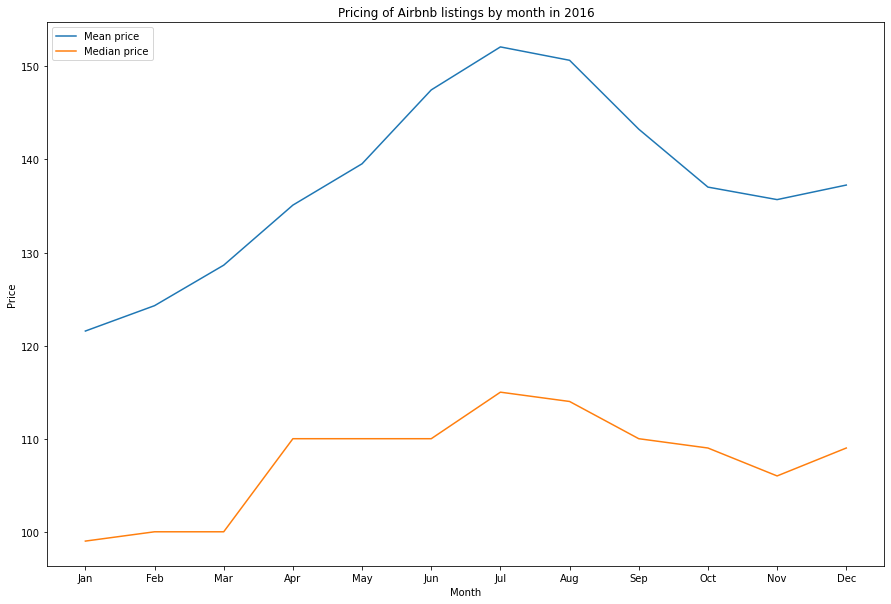

In [18]:
# time series plot for pricing by month in 2016. 
# We need to visualize both mean and median values because there might be outliers affect the mean values
fig = plt.figure(figsize =(15, 10))
sb.lineplot(x="month", y="mean_price", data=dfc_price, label = 'Mean price')
sb.lineplot(x="month", y="median_price", data=dfc_price, label = 'Median price')
plt.title('Pricing of Airbnb listings by month in 2016')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(loc = "upper left")
# plt.xlim(0,800)
plt.show()

#### Comment
The above graph shows that in 2016, from January to Mars, the average price of most listings was about $100. It started to soar after Mars and peak in summer months before going down while the winter was coming. It can be explained that summer was the busiest season in Seattle, many visitors chose to travel to this place between April to October.

# Question 2: Top 5 neighborhoods which were the most expensive and the most affordable in Seattle?

#### Analyze

In [19]:
# Get necessary columns from listings data to analyze for the question
dfl = df_l[['host_id','neighbourhood_cleansed','price']]
# Convert "Price" datatype to numeric and remove Null value
dfl = convert_to_numeric(dfl, 'price')
dfl

,host_id,neighbourhood_cleansed,price
0,956883,West Queen Anne,85.0
1,5177328,West Queen Anne,150.0
2,16708587,West Queen Anne,975.0
3,9851441,West Queen Anne,100.0
4,1452570,West Queen Anne,450.0
...,...,...,...
3813,31148752,Fremont,359.0
3814,46566046,Portage Bay,79.0
3815,52791370,Rainier Beach,93.0
3816,25522052,Madison Park,99.0


In [20]:
# Compute mean and median price in every neighborhooh in 2016
dfl_price = dfl.groupby(['neighbourhood_cleansed']).agg({'price':['mean', 'median']}).reset_index()

# Rename columns 
dfl_price.columns = dfl_price.columns.droplevel(1)
dfl_price.columns = ['neighbourhood_cleansed', 'mean_price', 'median_price']
dfl_price

,neighbourhood_cleansed,mean_price,median_price
0,Adams,121.671429,99.5
1,Alki,171.619048,126.5
2,Arbor Heights,126.800000,100.0
3,Atlantic,111.396226,95.0
4,Belltown,162.893162,139.0
...,...,...,...
82,West Woodland,124.343750,95.0
83,Westlake,194.470588,150.0
84,Whittier Heights,128.653846,110.0
85,Windermere,169.900000,127.5


In [21]:
# Get top 5 of neighborhoobs which have the highest price
top_expensive = dfl_price.sort_values(by=['mean_price'], ascending=False).head(5)
top_expensive

,neighbourhood_cleansed,mean_price,median_price
73,Southeast Magnolia,231.705882,150.0
61,Portage Bay,227.857143,132.5
83,Westlake,194.470588,150.0
81,West Queen Anne,187.769231,130.0
48,Montlake,182.789474,125.0


In [22]:
# Get top 5 of neighborhoobs which have the lowest price
top_cheap = dfl_price.sort_values(by=['mean_price'], ascending=True).head(5)
top_cheap

,neighbourhood_cleansed,mean_price,median_price
62,Rainier Beach,68.555556,60.0
56,Olympic Hills,71.687500,55.5
70,South Delridge,74.666667,67.5
24,Georgetown,76.125000,72.5
54,North Delridge,76.375000,72.5


#### Visualize

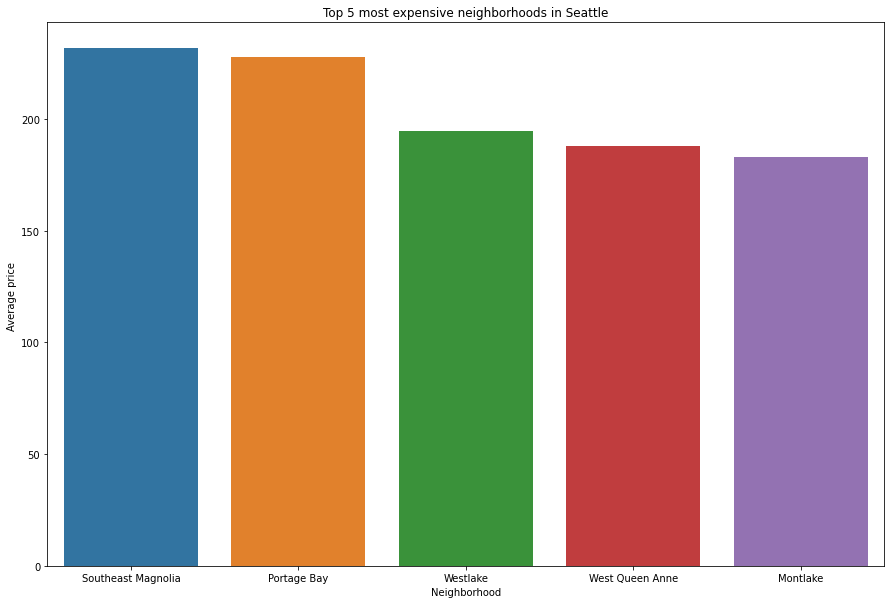

In [23]:
# Visualize top 5 most expensive neighborhoods in Seattle
fig = plt.figure(figsize =(15, 10))
sb.barplot(x = 'neighbourhood_cleansed',y = 'mean_price',data = top_expensive)
plt.title('Top 5 most expensive neighborhoods in Seattle')
plt.xlabel('Neighborhood')
plt.ylabel('Average price ')
plt.show()

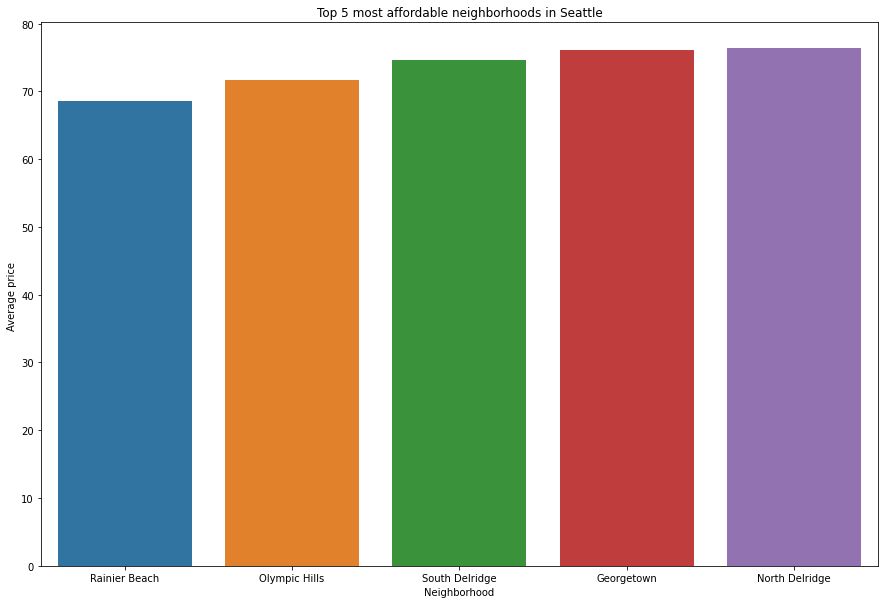

In [24]:
# Visualize top 5 most lowest price neighborhoods in Seattle
fig = plt.figure(figsize =(15, 10))
sb.barplot(x = 'neighbourhood_cleansed',y = 'mean_price',data = top_cheap)
plt.title('Top 5 most affordable neighborhoods in Seattle')
plt.xlabel('Neighborhood')
plt.ylabel('Average price ')
plt.show()

#### Comment
As we can see, Southeast Magnolia was the most expensive neighborhood where a visitor in average had to pay $231 for a night in this place.

Whereas if visitors chose to stay in Rainier Beach, they only need to pay nearly $70 for a night.

# Question 3: How did the number of new hosts increase by time?

#### Analyze

In [25]:
# Get necessary columns from listings data to analyze for the question
dfl_host = df_l[['host_id','host_since']]

In [26]:
dfl_host = convert_to_datetime(dfl_host, 'host_since')

/home/mianguyen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/mianguyen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/mianguyen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [27]:
# Count unique new host registered through time
dfl_newhost = dfl_host.groupby(['host_since']).agg({'host_id':'nunique'}).reset_index()
dfl_newhost

,host_since,host_id
0,2008-11-10,1
1,2009-01-08,1
2,2009-02-16,1
3,2009-03-03,1
4,2009-03-30,1
...,...,...
1375,2015-12-29,1
1376,2015-12-30,1
1377,2016-01-01,1
1378,2016-01-02,2


In [28]:
# Count cummulative sum of new host id through time
dfl_newhost['cumsum_host_id'] = dfl_newhost['host_id'].cumsum()
dfl_newhost

,host_since,host_id,cumsum_host_id
0,2008-11-10,1,1
1,2009-01-08,1,2
2,2009-02-16,1,3
3,2009-03-03,1,4
4,2009-03-30,1,5
...,...,...,...
1375,2015-12-29,1,2743
1376,2015-12-30,1,2744
1377,2016-01-01,1,2745
1378,2016-01-02,2,2747


#### Visualize

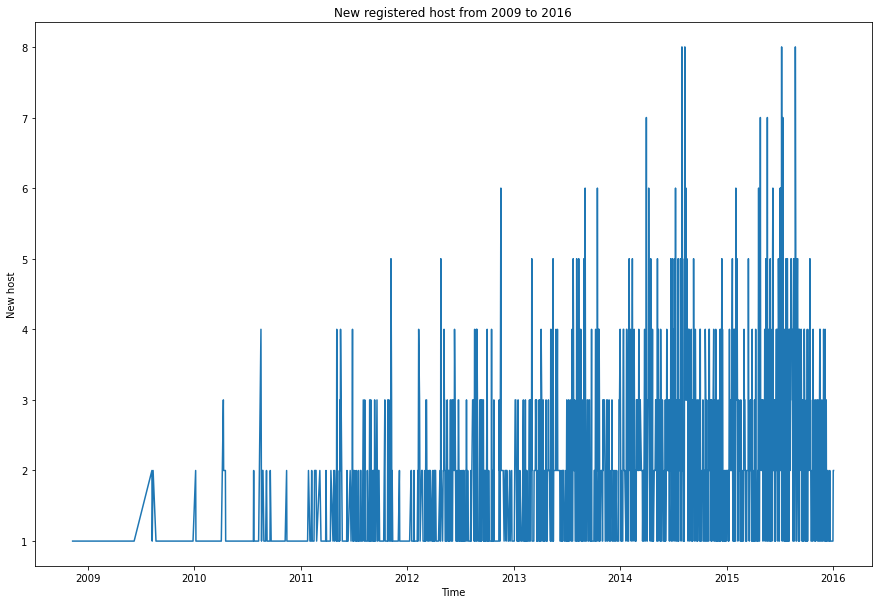

In [29]:
# Time series plot show number of new hosts by time
fig = plt.figure(figsize =(15, 10))
sb.lineplot(x="host_since", y="host_id", data=dfl_newhost)
plt.title('New registered host from 2009 to 2016')
plt.xlabel('Time')
plt.ylabel('New host')
plt.show()

#### Comment
According to the graph, it can be seen that the number of Airbnb hosts in Seattle increased from 2009 to 2016, and it was faster by time.

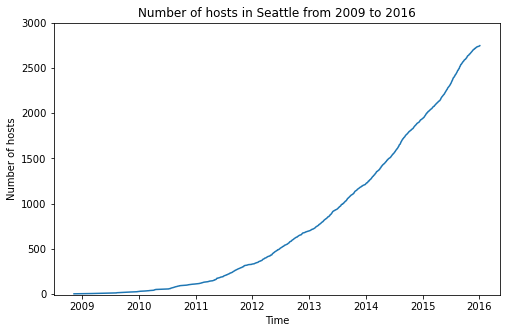

In [30]:
# Time series plot to show how many hosts that registered to Airbnb through time
fig = plt.figure(figsize = (8, 5))
sb.lineplot(x="host_since", y="cumsum_host_id", data=dfl_newhost)
plt.title('Number of hosts in Seattle from 2009 to 2016')
plt.ylabel('Number of hosts')
plt.xlabel('Time')
plt.ylim(-10,3000)
plt.show()

#### Comment

Airbnb had only 1 host in Seattle in 2009, but 7 years later, there were more than 2700 hosts in this state.

It proved that their business had been growing a lot during that time. Their service has been providing people a profitable way to earn money from renting a spare room in their house. Visitors also find it more flexible and personalized when they need a place to stay everywhere they come.

## 5. Conclusion

Based on what I have found from the datasets, I can say that summer in Seattle is the busy time and it would cost more compared to other seasons. If I want to save money when I stay in the state, I can consider to rent a homestay in the top neighborhoods which have the lowest average price, otherwise in the top most expensive, it could give me more worthy values. Finally, business of Airbnb has been growing, it’s providing a solution for people to not waste their spare home.